# 1.Installing Python packages

In [2]:
%pip install numpy==2.2.6 pandas==2.3.3 scikit-learn==1.7.2 scipy==1.15.3 MDAnalysis==2.9.0 matplotlib==3.4.3 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /home/houfang/Desktop/APP/MD2NMR-APP_20250719/example/test_env/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2.Configuring the config.py file

In [4]:
with open("./src/config.py", "r") as f:
    content = f.read()
print(content)

#this is a config file for NMR relaxation rate calculation
#Written by TW Jan 2023, Subsequently modified and updated by Houfang Zhang and Yunhui Peng in July 2025
#This script and the main software is subject to the MIT liscence

### DEFINE PARAMETERS ###

""" 
1. Number of split to truncate the MD trajectory. The averaged N-H vector and its standard deviation will be used to assist scipy.curve_fit to gain a better fitting for the correlation function.
2. Tau_max in nanosecond. This is the threshold value to truncate the correlation function. Normally select 1.8ns or 6.5ns based on result from Musselman et al. 2010
3. The magnetic field strength. This is corresponds to the experiment result. Field Strength = 18.8 for 800 MHz [Teslas], 19.9 for 850 MHz
4. residue start and end index in list format. [[start_resid, end_resid], [start_resid_2, end_resid_2]]. Calculations will be based on residues in this range (including the start and end residues), excluding PRO residues since they don't

# 3.Running the MD2NMR program

In [6]:
!python3 ./src/md2nmr.py -t WT_rw_run1.pdb -y WT_rw_run1_2000ns_40ps.xtc 

/home/houfang/miniconda3/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
###############    Software starting now.    ###############
Input argument and config files currently using:
Namespace(topo='WT_rw_run1.pdb', traj='WT_rw_run1_2000ns_40ps.xtc', batch=False)
n_split: 10
tau_max: 50
B0: 14.1
resid: [[0, 37]]
use_chain_ids: True
chain_ids: ['E']
wd: ./data/
od: ./data/
dt: 40
n_exp: 3
traj_segment: [2000, 50000]
traj_stride: 1
use_align: True
tumbling_time: None
fit_log: True
n_fit_log_point: None
prefix_list: ['WT_rw_run1_2000ns_40ps']
###############    Calculation starting...    ####

In [7]:
!python ./src/md2nmr.py -t H3.pdb -y H3_1.xtc

/home/houfang/miniconda3/lib/python3.10/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
###############    Software starting now.    ###############
Input argument and config files currently using:
Namespace(topo='H3.pdb', traj='H3_1.xtc', batch=False)
n_split: 10
tau_max: 50
B0: 14.1
resid: [[0, 37]]
use_chain_ids: True
chain_ids: ['E']
wd: ./data/
od: ./data/
dt: 40
n_exp: 3
traj_segment: [2000, 50000]
traj_stride: 1
use_align: True
tumbling_time: None
fit_log: True
n_fit_log_point: None
prefix_list: ['WT_rw_run1_2000ns_40ps']
###############    Calculation starting...    ###############
Calculation us

# 4.Visualizing NMR data

## 4.1 Showing the chi-squared (χ²) and R² values to quantify the differences between the fitted autocorrelation curves and the raw c(t) data

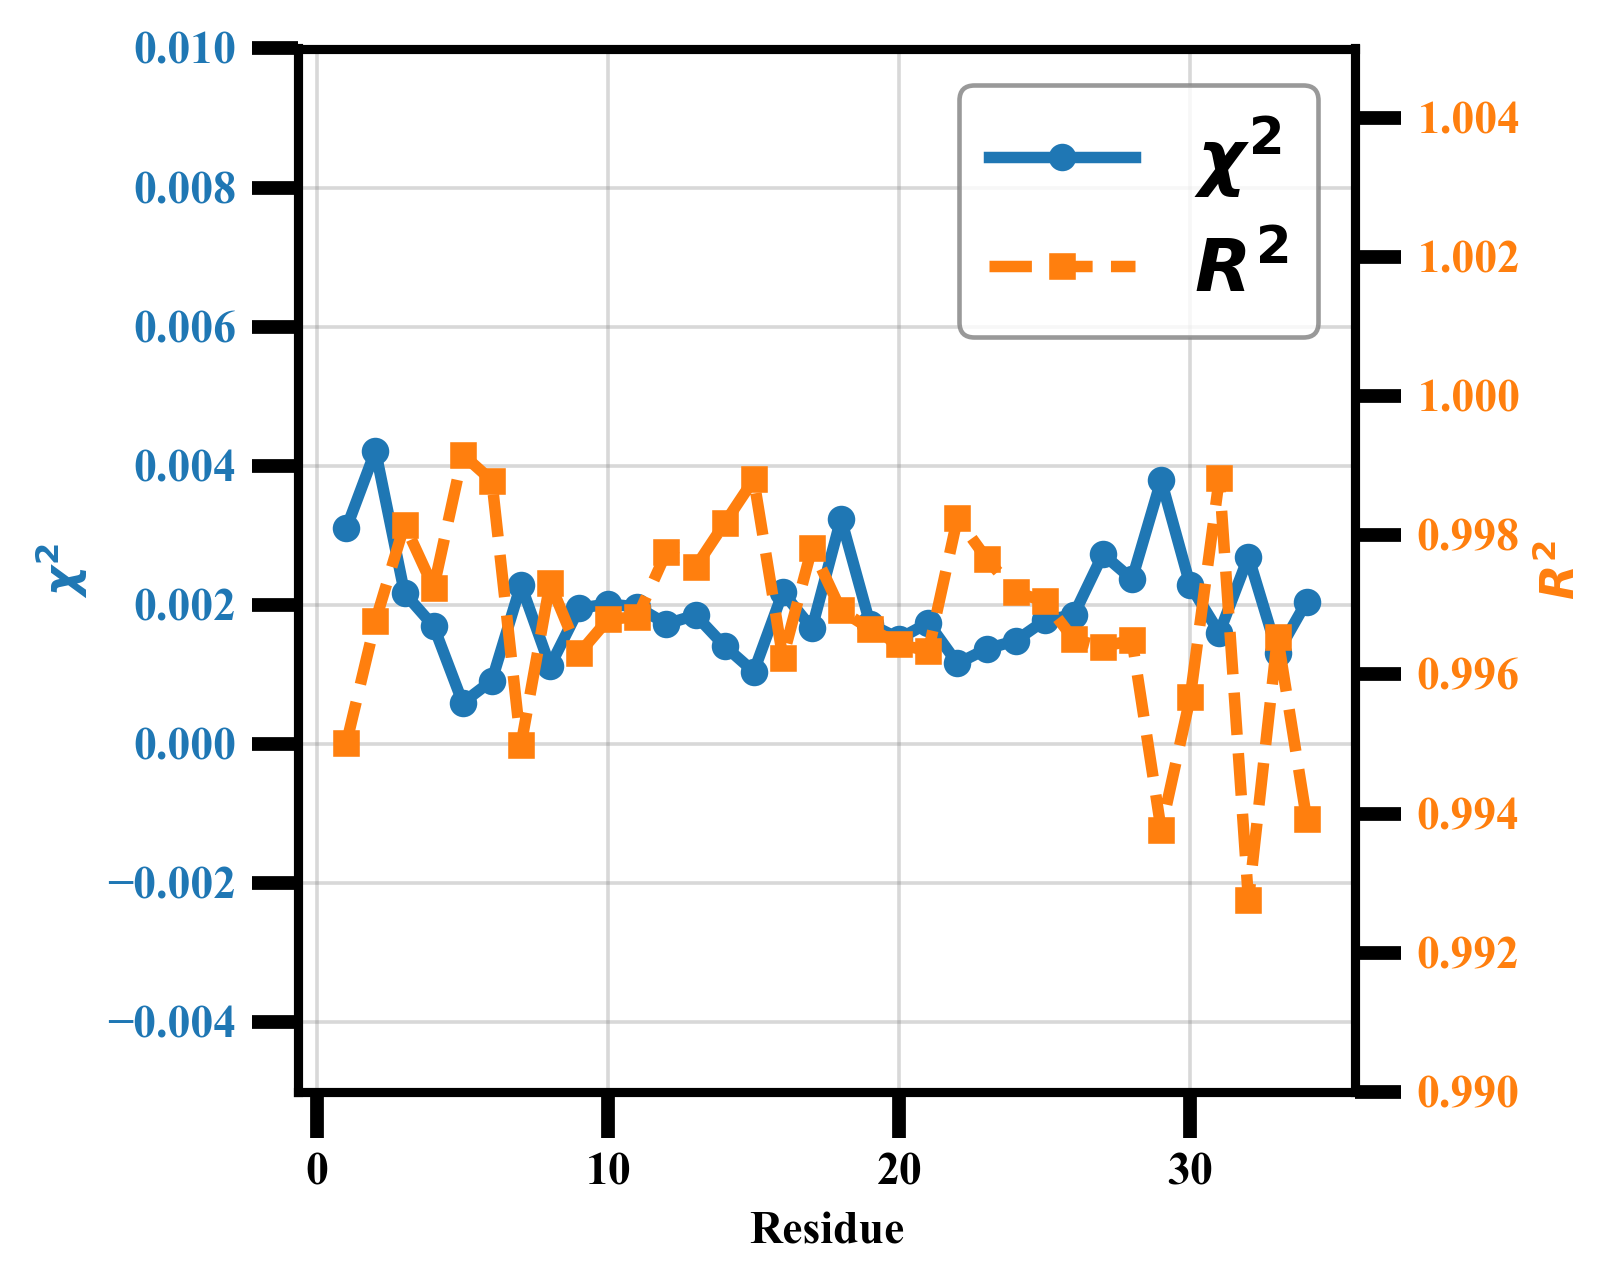

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if not hasattr(np, "Inf"):
    np.Inf = np.inf
plt.rcParams["figure.dpi"] = 330
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.labelweight"] = "bold"
df_data = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_Relaxtion.csv")
df_residue = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_NH_Res.csv")
x = df_residue.iloc[1:, 0].to_numpy()
y1 = df_data["Chi_Fit"].iloc[1:].to_numpy()
y2 = df_data["R2_Fit"].iloc[1:].to_numpy()
fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.plot(x, y1, 'o-', color="#1f77b4", linewidth=2.5, markersize=5, label='Chi_Fit')
ax1.set_xlabel('Residue', fontsize=10, fontweight='bold')
ax1.set_ylabel(r'$\chi^2$', fontsize=10, fontweight='bold', color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", width=3, length=10, labelsize=10)
ax1.tick_params(axis='x', width=3, length=10, labelsize=10)
#ax1.set_xlim(1, 35) 
ax1.set_ylim(-0.005, 0.01)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax2 = ax1.twinx()
ax2.plot(x, y2, 's--', color="#ff7f0e", linewidth=2.5, markersize=5, label='R2_Fit')
ax2.set_ylabel(r'$R^2$', fontsize=10, fontweight='bold', color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", width=3, length=10, labelsize=10)
ax2.set_ylim(0.99, 1.005)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
labels_1 = [r'$\chi^2$']
labels_2 = [r'$R^2$']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
     loc='best', fontsize=16, frameon=True,
     facecolor='white', edgecolor='gray')

ax1.grid(color="grey", alpha=0.3)
plt.tight_layout()
plt.savefig("Chi_R2_dual_axis_plot.png")

## 4.2 Plotting NMR relaxation parameters

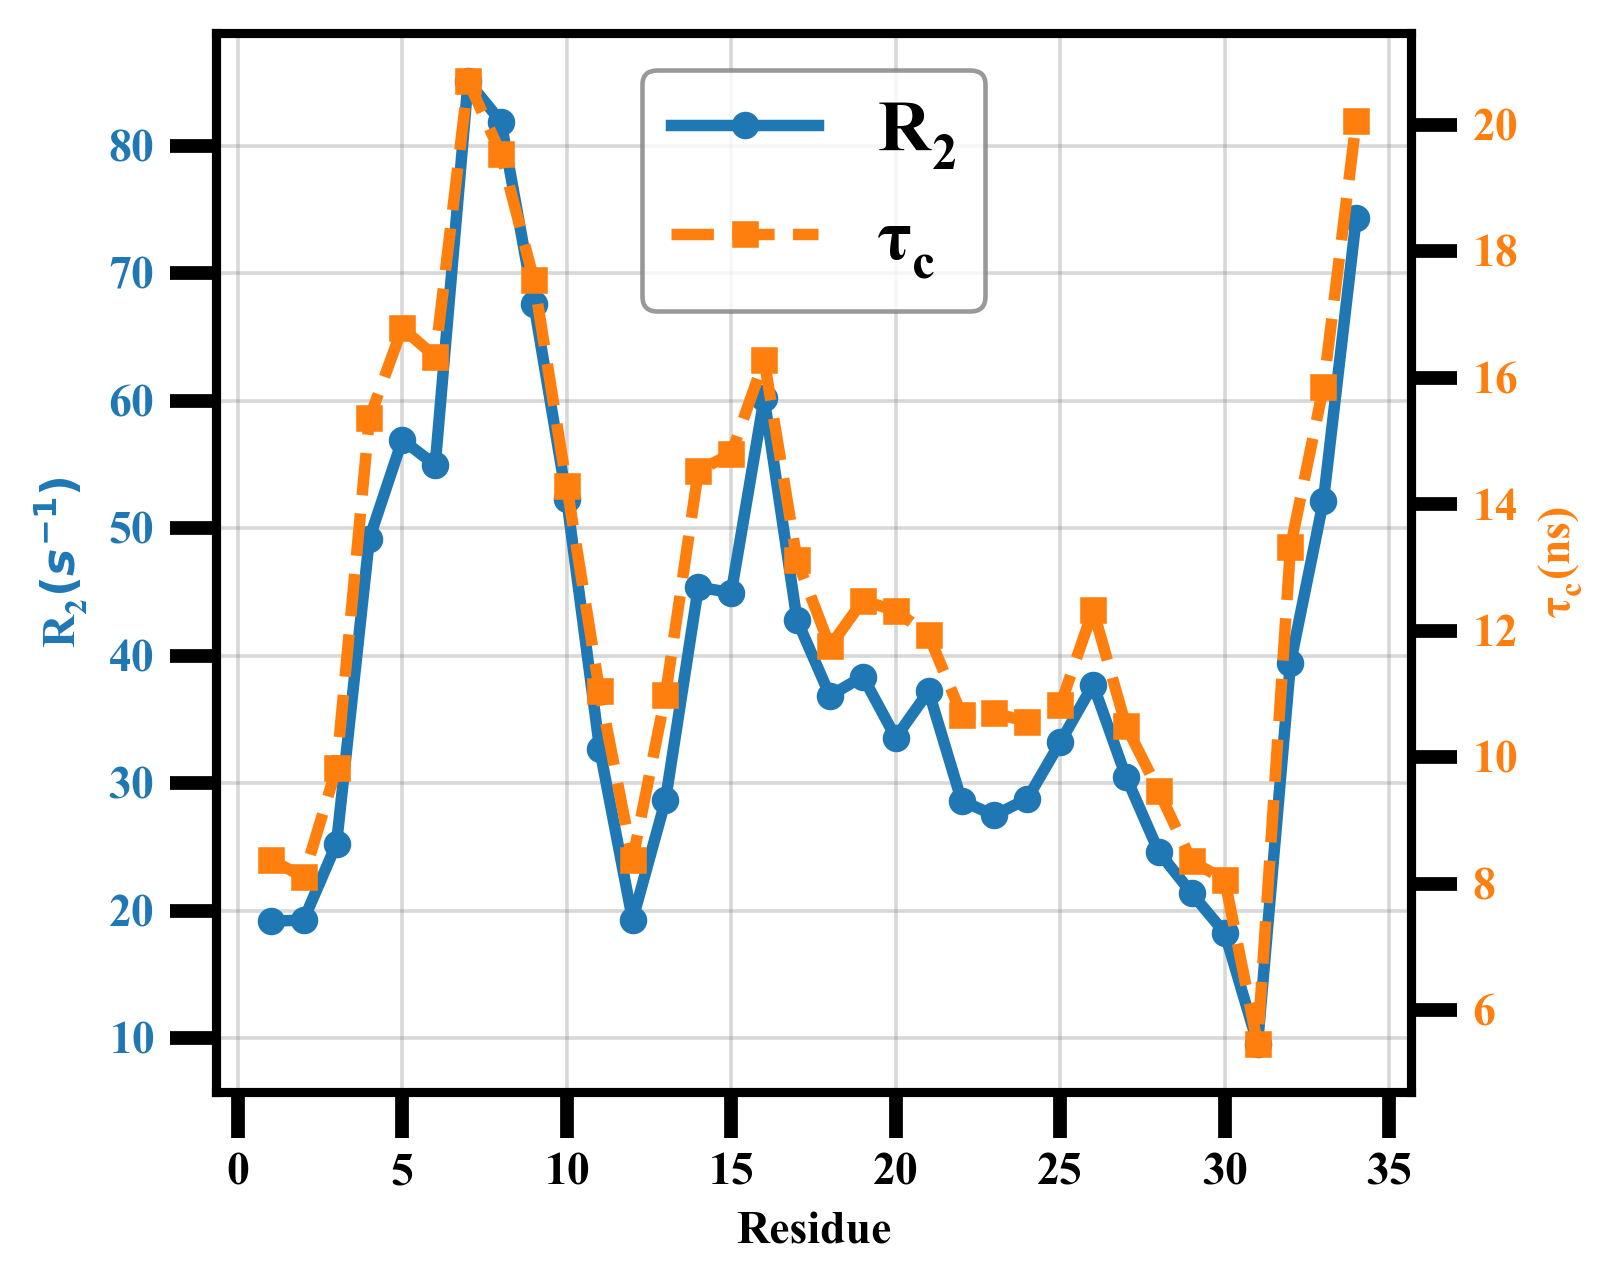

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if not hasattr(np, "Inf"):
    np.Inf = np.inf

plt.rcParams["figure.dpi"] = 330
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.labelweight"] = "bold"
df_data = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_Relaxtion.csv")
df_residue = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_NH_Res.csv")
x = df_residue.iloc[1:, 0].to_numpy() 
y1 = df_data["R2"].iloc[1:].to_numpy()
y2 = df_data["tau_c"].iloc[1:].to_numpy()
fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.plot(x, y1, 'o-', color="#1f77b4", linewidth=2.5, markersize=5, label='Chi_Fit')
ax1.set_xlabel('Residue', fontsize=10, fontweight='bold')
ax1.set_ylabel(r'$\mathregular{R_2}(s^{-1})$', fontsize=10, fontweight='bold', color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", width=3, length=10, labelsize=10)
ax1.tick_params(axis='x', width=3, length=10, labelsize=10)
#ax1.set_xlim(0, 10) 
#ax1.set_ylim(-0.005, 0.2)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax2 = ax1.twinx()
ax2.plot(x, y2, 's--', color="#ff7f0e", linewidth=2.5, markersize=5, label='R2_Fit')
ax2.set_ylabel(r'$\mathregular{τ_c}$(ns)', fontsize=10, fontweight='bold', color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", width=3, length=10, labelsize=10)
#ax2.set_ylim(0.80, 1.005)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
labels_1 = [r'$\mathregular{R_2}$']
labels_2 = [r'$\mathregular{τ_c}$']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
     loc='best', fontsize=16, frameon=True,
     facecolor='white', edgecolor='gray')


ax1.grid(color="grey", alpha=0.3)
plt.tight_layout()
plt.savefig("NMR-data-Tau_c-and-R2.png")